In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

In [2]:
arq_dados = "apple_quality.csv" # arquivo dataset

In [3]:
df = pd.read_csv(arq_dados, sep = ",") # lendo o dataset

In [4]:
df.head() # exibindo as 5 primeiras linhas

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.tail() # exibindo as 5 ultimas linhas

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [6]:
df.info() # informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
df.drop(columns = "A_id", inplace=True, axis=0) # removendo atributo irrelevante

In [8]:
df.isnull().sum() # registros nulos

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [9]:
df[df.isnull().any(axis=1)] # linhas que contém registros nulos

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [10]:
df.drop(4000, axis=0, inplace=True) # removendo linha que contém registros nulos

In [11]:
df["Acidity"] = pd.to_numeric(df["Acidity"]) # transformando a coluna "acidity" para númerica

In [12]:
# Dados inconsistentes
df[df.duplicated(subset=["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness","Acidity"], keep=False)]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [13]:
# Dados duplicados
df[df.duplicated()]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [14]:
df.describe() # medidas descritivas

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [15]:
norm = StandardScaler() # função de transformação 

In [16]:
norm.fit(df.iloc[:,:-1]) # treinando a

StandardScaler()

In [17]:
df_norm = pd.DataFrame(norm.transform(df.iloc[:,:-1])) # normalizando a base de dados

In [18]:
df_norm.columns = df.select_dtypes(include=np.number).columns # nomeando as colunas
df_norm["Quality"] = df["Quality"]

In [19]:
df_norm.describe().round(8) # medidas descritivas (média tem que estar 0 e desvio padrão 1) por conta da transformação

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
std,1.000125,1.000125,1.000125,1.000125,1.000125,1.000125,1.000125
min,-3.448816,-3.844645,-3.305895,-5.019697,-3.354335,-3.394996,-3.358956
25%,-0.681470,-0.637970,-0.652505,-0.657868,-0.680504,-0.677601,-0.689240
50%,-0.005544,0.003002,-0.017641,0.009106,0.011451,0.002757,-0.025720
75%,0.678768,0.636909,0.654797,0.647917,0.685921,0.676523,0.679437
max,3.584043,4.231561,3.522747,4.730115,3.550325,3.595980,3.472909


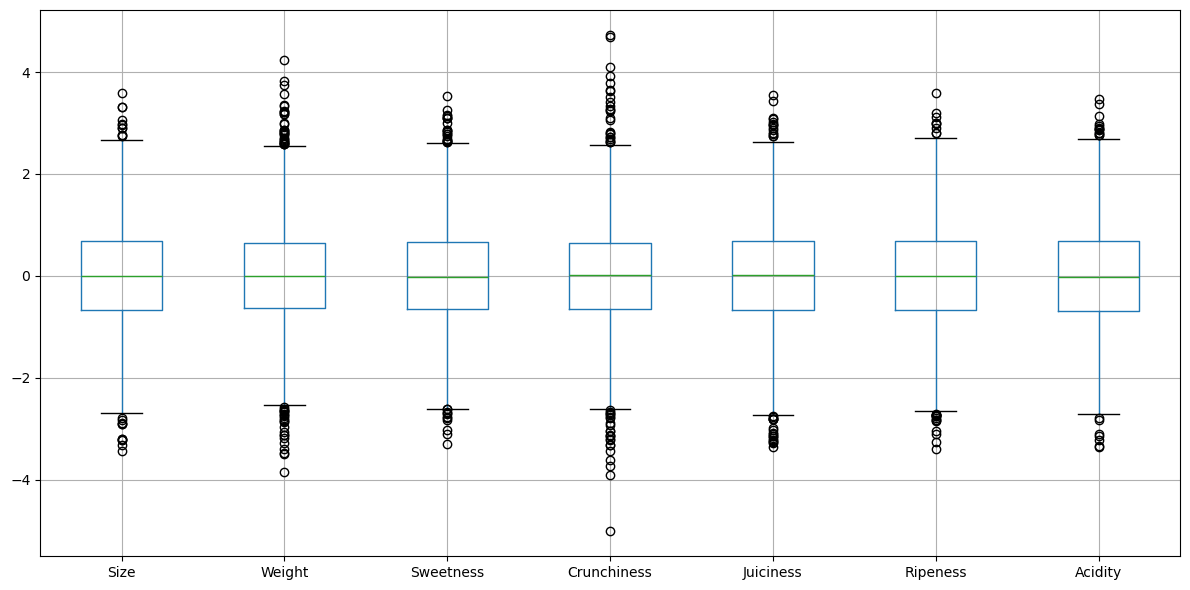

In [20]:
# Detecção de outliers dos atributos
df_norm.boxplot(figsize=(12,6))
plt.tight_layout()
plt.show()

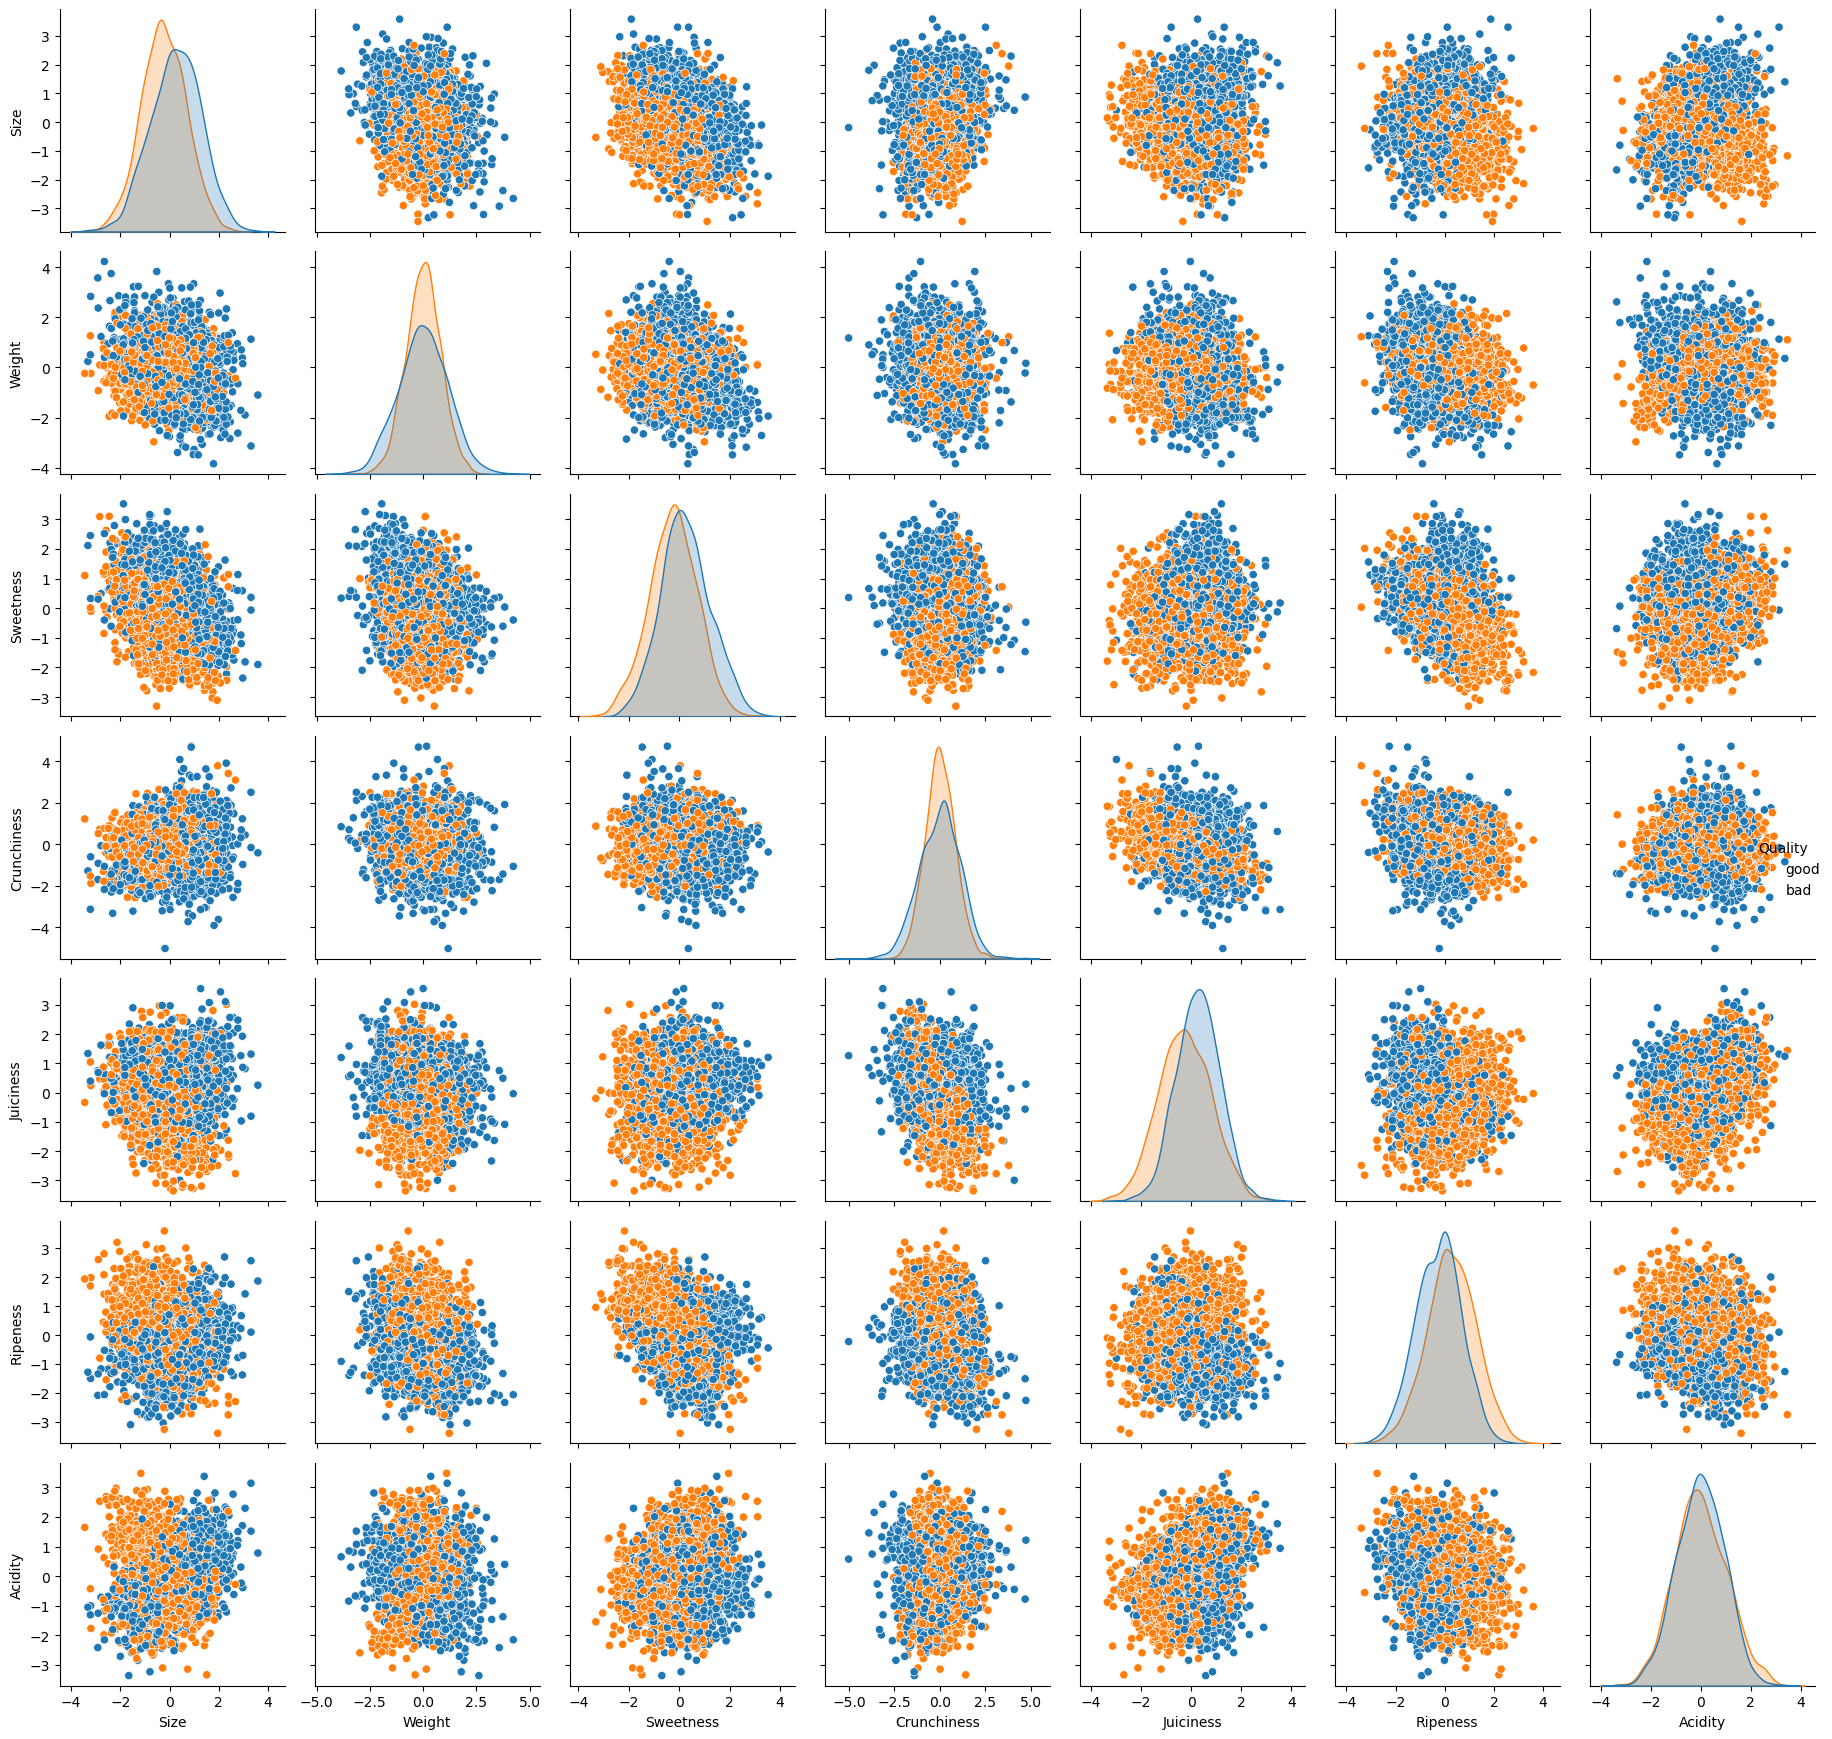

In [21]:
# Histogramas e dispersão dos atributos
sns.pairplot(df_norm, hue = "Quality")
plt.tight_layout()
plt.show()

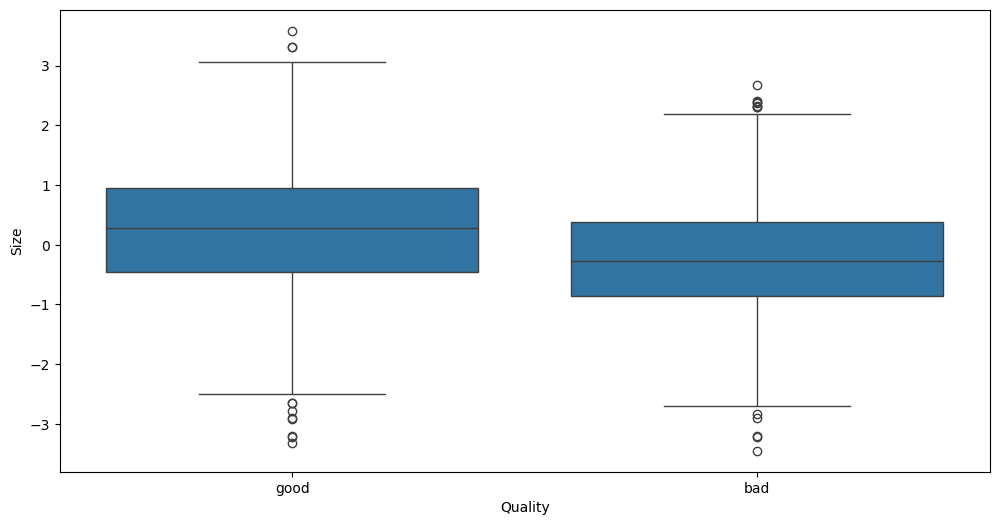

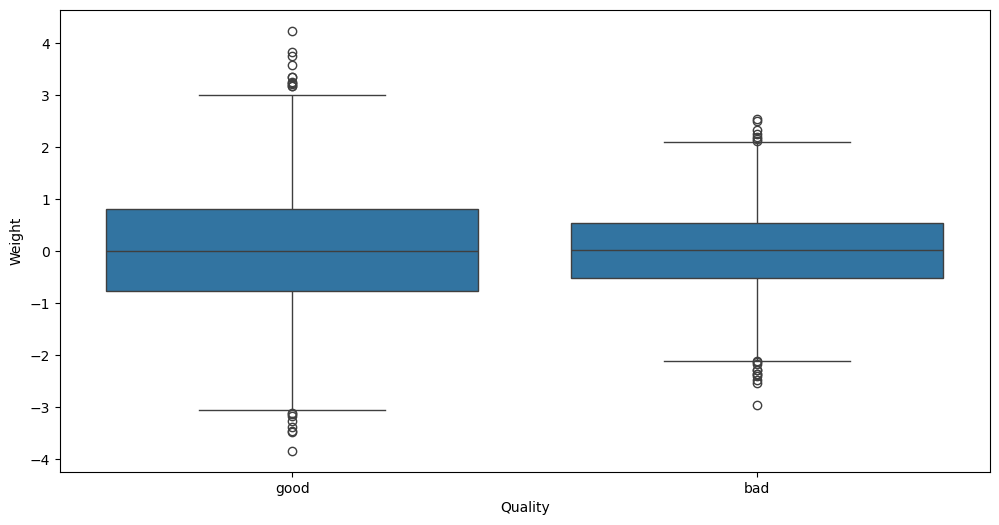

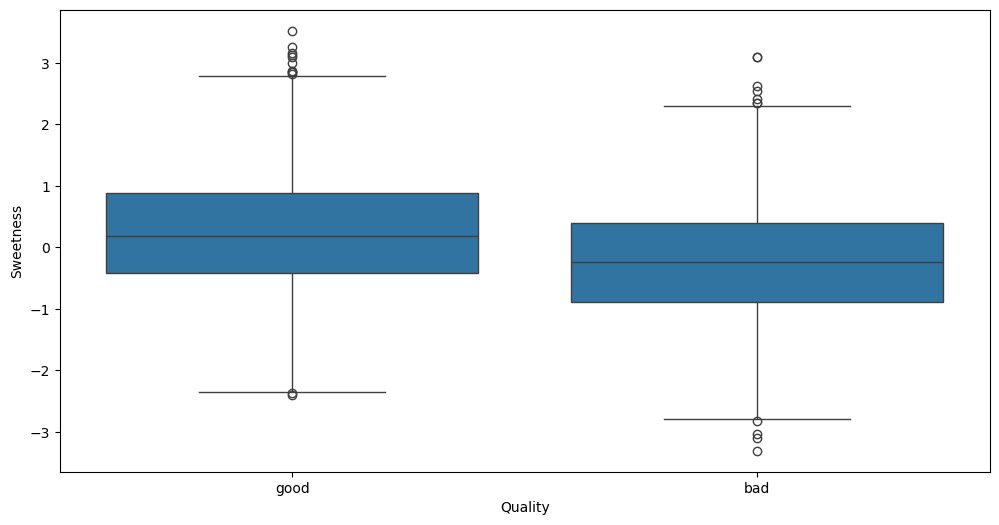

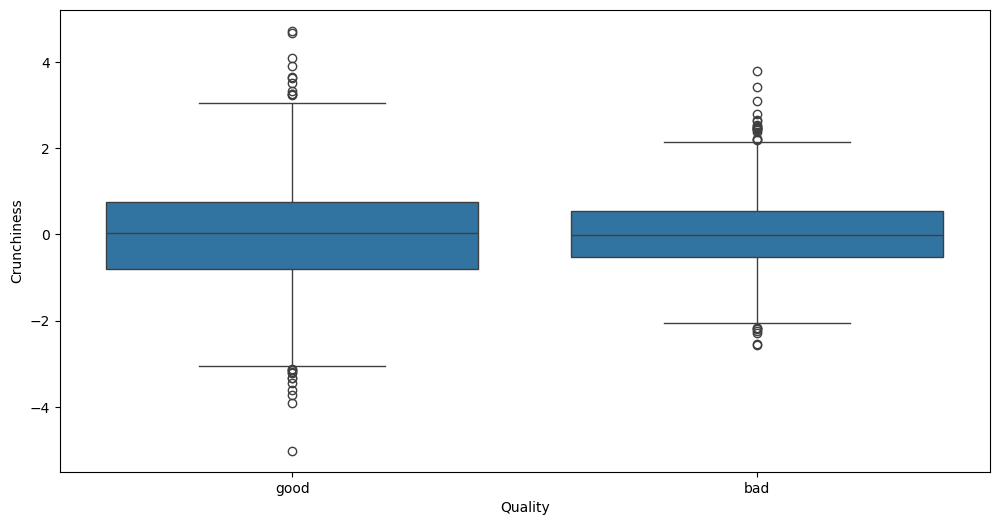

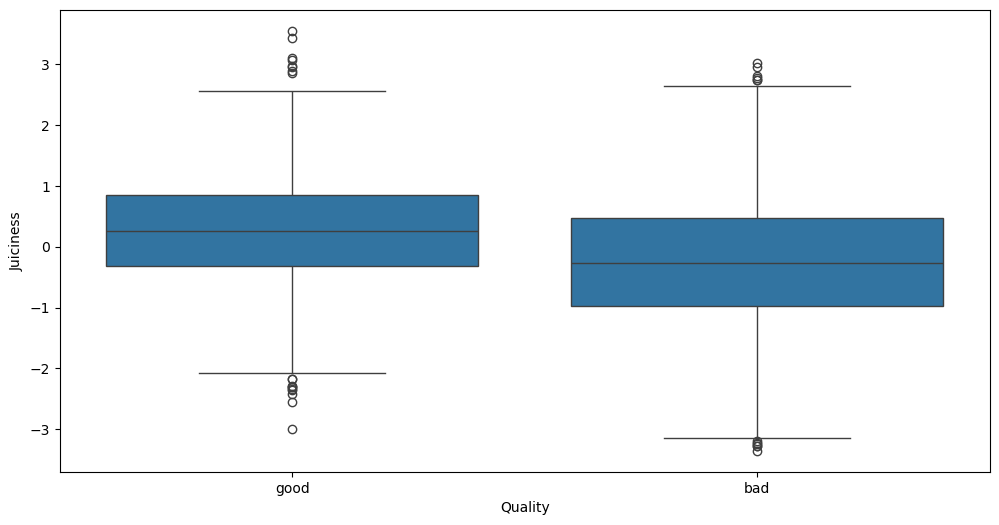

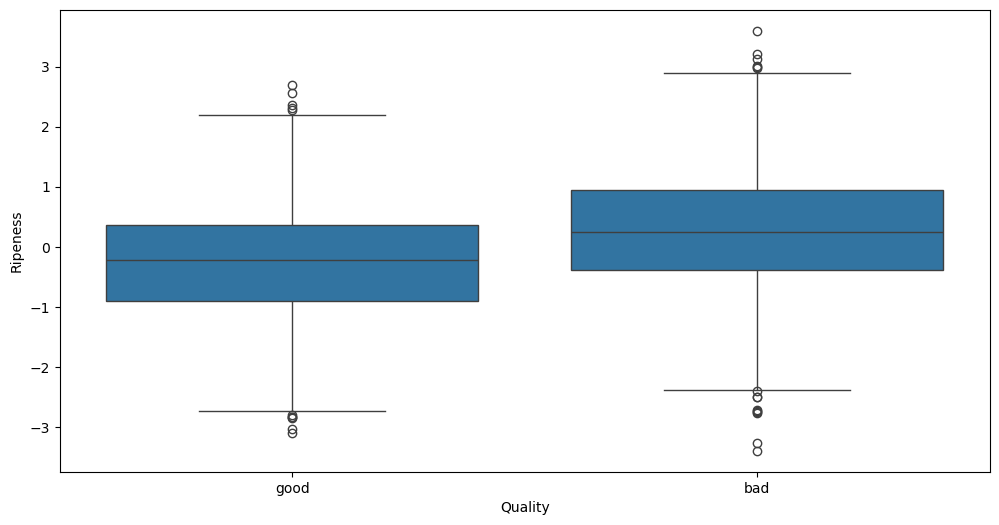

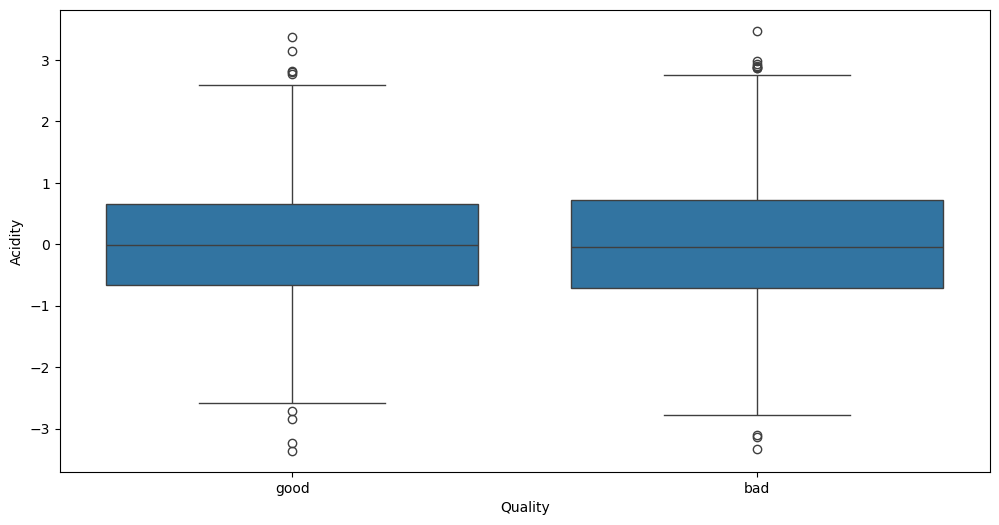

In [22]:
# Detecção de outliers por cada atributo
for atributo in df_norm.columns[:-1]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x="Quality", y = atributo, data= df_norm)
    plt.show()    

In [23]:
# Removendo outliers
for atributo in df_norm.columns[:-1]:

    # Obtem o terceiro e o primeiro quartil.
    q75, q25 = np.percentile(df_norm[atributo].values, [75 ,25])

    # Calcula o IQR
    IQR = q75 - q25

    # Remove os outliers com base no valor do IQR
    df_norm = df_norm[(df_norm[atributo]<=((q75+1.5)*IQR)) & (df_norm[atributo]>=((q25-1.5)*IQR)) ]

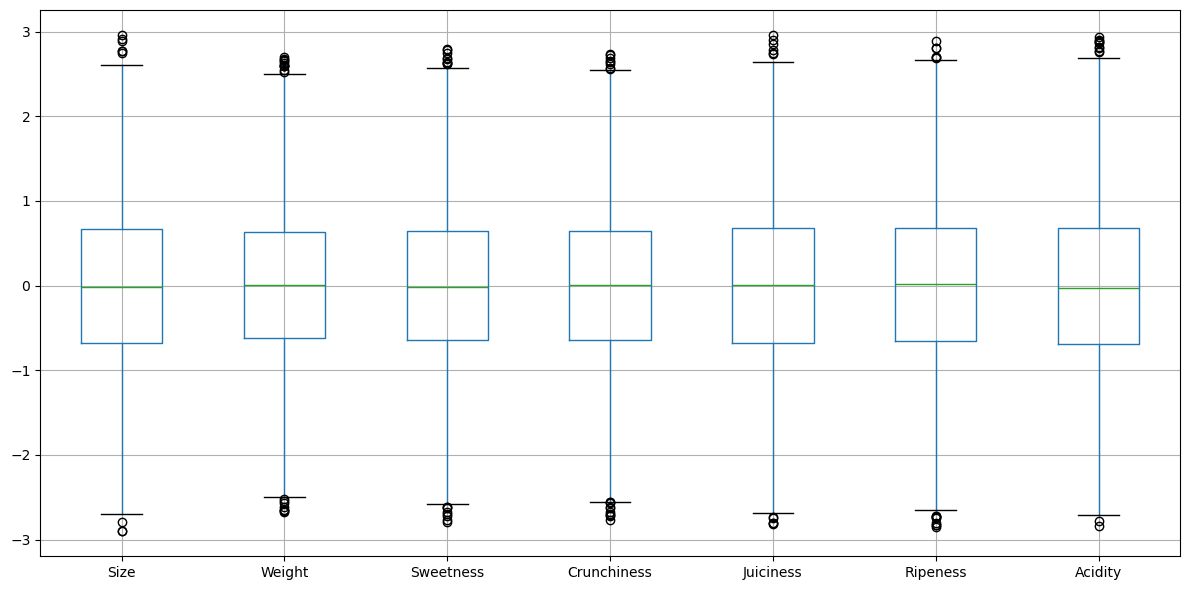

In [24]:
# Verificação após a remoção
df_norm.boxplot(figsize=(12,6))
plt.tight_layout()
plt.show()

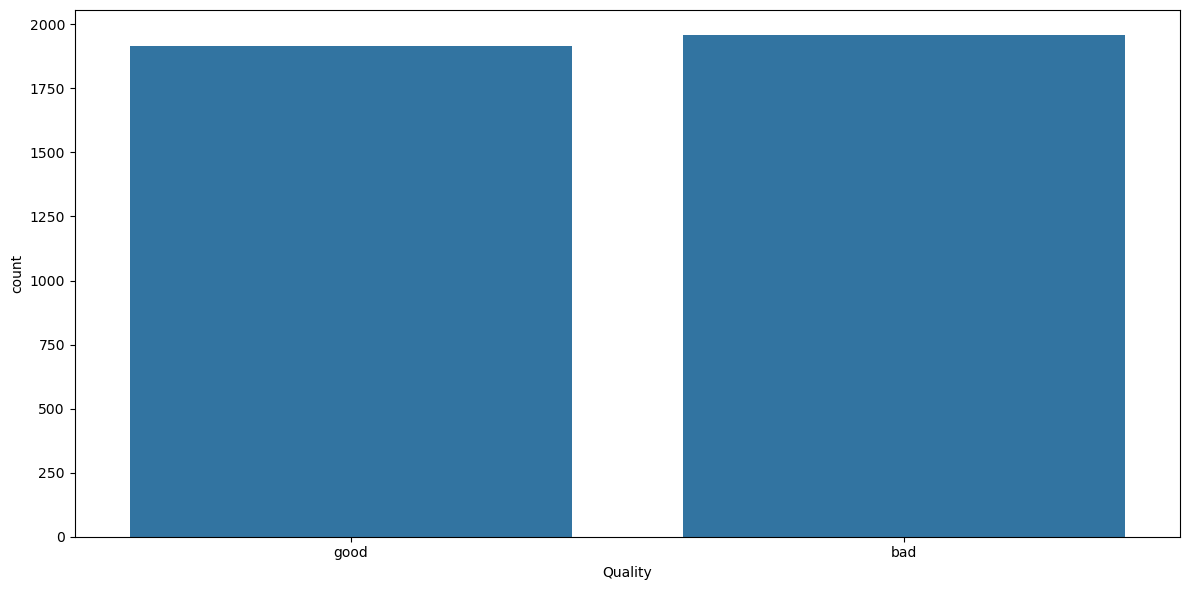

Quality
bad     1958
good    1914
Name: count, dtype: int64

In [25]:
# Distribuição das classes
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Quality", data=df_norm)
plt.tight_layout()
plt.show()
display(df_norm["Quality"].value_counts())

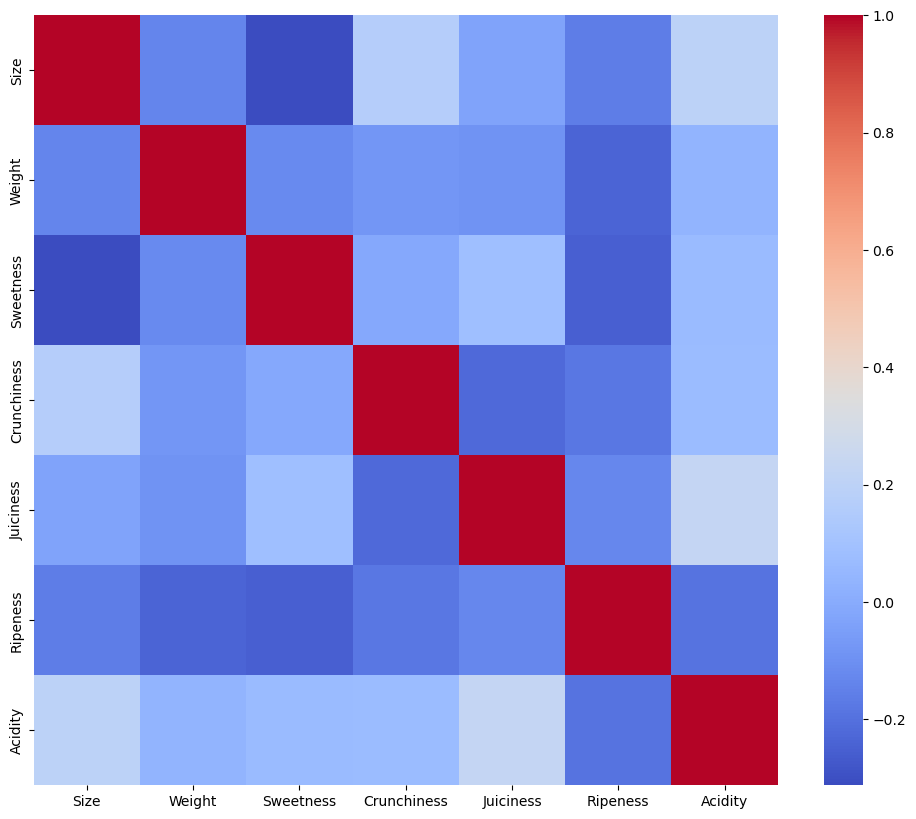

In [26]:
# Correlação entre os atributos
df_corr = df_norm.drop(columns = "Quality")
corr = df_corr.corr(method="spearman")
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap="coolwarm", fmt=".2f")
plt.show()

In [27]:
display(corr)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.134383,-0.312367,0.166904,-0.034333,-0.162745,0.199819
Weight,-0.134383,1.000000,-0.120380,-0.079993,-0.087545,-0.240014,0.032554
Sweetness,-0.312367,-0.120380,1.000000,-0.013538,0.087427,-0.254729,0.064325
Crunchiness,0.166904,-0.079993,-0.013538,1.000000,-0.222185,-0.182961,0.068340
Juiciness,-0.034333,-0.087545,0.087427,-0.222185,1.000000,-0.130128,0.227305
Ripeness,-0.162745,-0.240014,-0.254729,-0.182961,-0.130128,1.000000,-0.191473
Acidity,0.199819,0.032554,0.064325,0.068340,0.227305,-0.191473,1.000000
